In [172]:
from typing import List, Optional

# Easy
**(24 Questions)**

### 1. [Two Sum](https://leetcode.com/problems/two-sum/description/)
Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.
You may assume that each input would have exactly one solution, and you may not use the same element twice.
You can return the answer in any order.

Example 1:

    Input: nums = [2,7,11,15], target = 9
    Output: [0,1]
    Explanation: Because nums[0] + nums[1] == 9, we return [0, 1].
Example 2:

    Input: nums = [3,2,4], target = 6
    Output: [1,2]
Example 3:

    Input: nums = [3,3], target = 6
    Output: [0,1]
---


#### Approach 1.1: BruteForce
**Time complexity: O(n^2)**
- For each element, we try to find its complement by looping through the rest of the array.

**Space complexity: O(1)**
- The space required while runtime does not depend on the number of elements in the array.

In [173]:
def twoSum_bruteForce(nums: List[int], target: int) -> List[int]:
    for i in range(len(nums)):
        for j in range(i+1,len(nums)):
            if nums[i] + nums[j] == target:
                return [i,j]      

### Testing
nums = [[2,7,11,15],[3,2,4], [3,3]]
target = [9,7,6]

for i in range(len(target)):
    print("twoSum_bruteForce: ", twoSum_bruteForce(nums[i], target[i]))

     

twoSum_bruteForce:  [0, 1]
twoSum_bruteForce:  [0, 2]
twoSum_bruteForce:  [0, 1]


---
#### Approach 1.2: 2-Pass Hashing
**Intution:** 
- To improve the runtime, we need to find the best way to maintain the mapping of elements in the array to their index. 
  - Use `hash table` - it supports fast lookup in near constant time
  - We can reduce the lookup time from `O(n)` to `O(1)` by trading space for speed.

**Algorithm:**
- Uses two iterations. 
  - first iteration, add each element's value as a key and its index as a value to the hash table. Then, in the 
  - second iteration, check if each element's complement `(target−nums[i])` exists in the hash table. 
    - If it does exist, return current element's index and its complement's index. 
    - Beware that the complement must not be `nums[i]` itself!

**Time complexity: `O(n)`**
- We traverse the list containing `n` elements exactly twice.
- hash table reduces the lookup time to `O(1)`,  the overall time complexity is `O(n)`.

**Space complexity: `O(n)`**
- Extra space is created for the hash table that is proportional to the elements in the array. 

In [174]:
def twoSum_2passhashing(nums: List[int], target: int) -> List[int]:
    hashmap = {}
    for i in range(len(nums)):
        hashmap[nums[i]] = i    #storing values at index
    for i in range(len(nums)):
        if target-nums[i] in hashmap and hashmap[target-nums[i]] != i:
            return [i,hashmap[target-nums[i]]]
        
### Testing
nums = [[2,7,11,15],[3,2,4], [3,3]]
target = [9,7,6]
for i in range(len(target)):
    print("twoSum_2passhashing: ", twoSum_2passhashing(nums[i], target[i]))
            

twoSum_2passhashing:  [0, 1]
twoSum_2passhashing:  [0, 2]
twoSum_2passhashing:  [0, 1]


---
#### Approach 1.3: 1-Pass Hashing
**Intution:** 
- While we are iterating and inserting elements into the hash table, 
  - we also look back to check if current element's complement already exists in the hash table. 
  - If it exists, we have found a solution and return the indices immediately.

**Algorithm:**
- Uses single iterations. 
  - first iteration, 
    - check if each element's complement `(target−nums[i])` exists in the hash table. 
      - If it does exist, return current element's index and its complement's index. 
      - else, add each element's value as a key and its index as a value to the hash table. 

**Time complexity: `O(n)`**
- We traverse the list containing `n` elements exactly twice.
- hash table reduces the lookup time to `O(1)`,  the overall time complexity is `O(n)`.

**Space complexity: `O(n)`**
- Extra space is created for the hash table that is proportional to the elements in the array added to the hash table.
- Worst case: there is no solution and all the elements have to be added in the hashtable. 

In [175]:
def twoSum_1passhashing(nums: List[int], target: int) -> List[int]:
    hashmap = {}
    for i in range(len(nums)):
        if target-nums[i] in hashmap:
            return [i, hashmap[target-nums[i]]]
        else:
            hashmap[i] = i

### Testing
nums = [[2,7,11,15],[3,2,4], [3,3]]
target = [9,7,6]

for i in range(len(target)):
    print("twoSum_2passhashing: ", twoSum_2passhashing(nums[i], target[i]))
            

twoSum_2passhashing:  [0, 1]
twoSum_2passhashing:  [0, 2]
twoSum_2passhashing:  [0, 1]



### 2. [Valid Parentheses](https://leetcode.com/problems/valid-parentheses/description/)

Given a string `s` containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.

An input string is valid if:
Open brackets must be closed by the same type of brackets.
Open brackets must be closed in the correct order.
Every close bracket has a corresponding open bracket of the same type.
 

Example 1:

    Input: s = "()"
    Output: true

Example 2:

    Input: s = "()[]{}"
    Output: true

Example 3:

    Input: s = "(]"
    Output: false
---

#### Approach 2.1: Using `stack`

**Pseudocode** 

- It iterates through each character of the input string `s`, maintaining a stack to keep track of opening brackets encountered. 
- Whenever it encounters a closing bracket, it checks if the corresponding opening bracket is at the top of the stack. 
  - If so, it removes the opening bracket from the stack; 
  - otherwise, it adds the closing bracket to the stack. 
- After processing all characters, if the stack is empty, 
  - it returns `True` indicating that all brackets are matched; 
  - otherwise, it returns `False`.

**Time Complexity: O(n)** 
- The time complexity of the algorithm is O(n), where n is the length of the input string `s`. 
- This is because the algorithm iterates through each character of the string exactly once.

**Space Complexity: O(n)** 
- The space complexity of the algorithm is also O(n), where n is the length of the input string `s`. 
- This is because the algorithm uses a stack data structure that can grow up to the length of the input string in the worst case.
- **worst case:** when all opening brackets are encountered before their corresponding closing brackets.

In [176]:
def isValid(s: str) -> bool:
        stack = []
        s = [*s]
        for i in range(len(s)):
                if len(stack)==0:
                     stack.append(s[i])
                elif stack[-1] == '(' and s[i] == ')':
                      stack.pop()
                elif stack[-1] == '[' and s[i] == ']':
                      stack.pop()
                elif stack[-1] == '{' and s[i] == '}':
                      stack.pop()
                else:
                      stack.append(s[i])
        return len(stack) == 0   

### Testing
nums = ["()","()[]{}", "(]"]

for i in range(len(target)):
    print("isValid: ", isValid(nums[i]))

     

isValid:  True
isValid:  True
isValid:  False


#### Approach 2.2: Using dict-stack
Pseudocode: 
1. Initialize an empty stack.
2. Iterate over each character in the input string.
3. If the current character is an opening bracket, push it onto the stack.
4. If the current character is a closing bracket:
   - If the stack is empty or the top of the stack does not match the expected opening bracket for the current closing bracket, return `False`.
   - Otherwise, pop the top of the stack.
5. After processing all characters, if the stack is empty, return `True`; otherwise, return `False`.

**Time Complexity: O(n)**
- The algorithm iterates over each character in the input string once, resulting in a time complexity of O(n), *(`n`: length of the input string)*.
- Each operation involving stack manipulation (push, pop) takes constant time.

**Space Complexity: O(n)**
- The space complexity is O(n), where n is the length of the input string. This is because the 
- worst-case scenario: when all characters in the string are opening brackets, and they are all pushed onto the stack.

In [177]:
def isValidDict(s: str) -> bool:
    stack = []
    brackets = {')': '(', ']': '[', '}': '{'}
    for char in s:
        if char in brackets.keys() and len(stack)==0: # if encoutering the closing brackets are first, return False
                return False
        if char in brackets.values():
            stack.append(char)
        elif char in brackets.keys() and  brackets[char] != stack.pop():
            return False
    return not stack



### Testing
nums = ["()","()[]{}", "(]"]
for i in range(len(target)):
    print("isValid: ", isValidDict(nums[i]))


isValid:  True
isValid:  True
isValid:  False


### 3. [Merge Two Sorted Lists](https://leetcode.com/problems/merge-two-sorted-lists/description/)

(*A simplified version than original question*)

You are given two sorted linked lists `list1` and `list2`.
Merge the two lists into one sorted list.

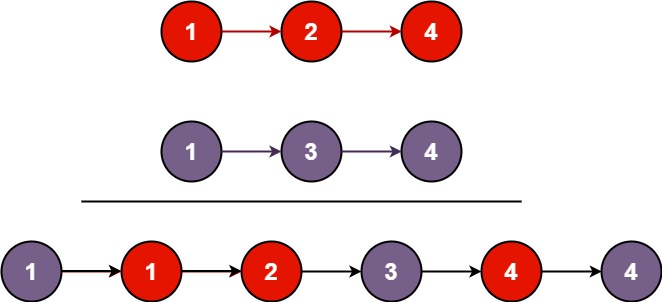

Example 1:


    Input: list1 = [1,2,4], list2 = [1,3,4]
    Output: [1,1,2,3,4,4]

Example 2:

    Input: list1 = [], list2 = []
    Output: []

Example 3:

    Input: list1 = [], list2 = [0]
    Output: [0]
---


#### Approach 3.1: Iterative

1. Initialize an empty list final_list.
2. While list1 or list2 is not empty:
-   If list1 is empty, extend final_list with list2 and return final_list.
-   If list2 is empty, extend final_list with list1 and return final_list.
-   If the first element of list2 is smaller than the first element of list1, remove and append it to final_list.
-   Otherwise, remove and append the first element of list1 to final_list.
3. Return final_list.

**Time Complexity:**
The time complexity of this function is O(n), where n is the total number of elements in both list1 and list2.

**Space Complexity:**
The space complexity of this function is O(n), where n is the total number of elements in both list1 and list2, as we are creating an additional list final_list to store the merged list.

---

In [178]:
        
def mergeTwoLists(list1: List, list2: List) -> List:
    final_list = []
    while list1 or list2:
        if not list1:
            final_list.extend(list2)
            return final_list
        elif not list2:
            final_list.extend(list1)
            return final_list
        elif list2[0]<list1[0]:
            final_list.append(list2.pop(0))
        else:
            final_list.append(list1.pop(0))
    return final_list    



### Testing
list1 = [[1, 2, 4], [], []]
list2 = [[1, 3], [], [0]]
for i in range(len(list1)):
    print("mergeTwoLists", mergeTwoLists(list1[i], list2[i]))


mergeTwoLists [1, 1, 2, 3, 4]
mergeTwoLists []
mergeTwoLists [0]



#### Approach 3.2: Recursive

1. If `list1` is empty, return `list2`.
2. If `list2` is empty, return `list1`.
3. If the first element of `list2` is greater than the first element of `list1`:
   -  Return a list consisting of the first element of `list1` concatenated with the result of merging the remaining elements of `list1` and `list2`.
4. Otherwise:
   - Return a list consisting of the first element of `list2` concatenated with the result of merging the remaining elements of `list1` and `list2`.

**Time Complexity:**  
The time complexity of this function is O(n), where n is the total number of elements in both `list1` and `list2`.

**Space Complexity:**  
The space complexity of this function is O(n), where n is the total number of elements in both `list1` and `list2`, as each recursive call creates a new list with a subset of the elements.

---

In [179]:
        
def mergeTwoListsRecursive(list1: List, list2: List) -> List:
    if not list1:
        return list2
    if not list2:
        return list1
    if list2[0]>list1[0]:
        return [list1[0]] + mergeTwoLists(list1[1:], list2)
    else:
        return [list2[0]] + mergeTwoLists(list2[1:], list1)


### Testing
list1 = [[1, 2, 4], [], []]
list2 = [[1, 3], [], [0]]
for i in range(len(list1)):
    print("mergeTwoListsRecursive", mergeTwoListsRecursive(list1[i], list2[i]))


mergeTwoListsRecursive [1, 1, 2, 3, 4]
mergeTwoListsRecursive []
mergeTwoListsRecursive [0]


### 4.  [Best Time to Buy and Sell Stock](https://leetcode.com/problems/best-time-to-buy-and-sell-stock/description/) 

You are given an array `prices` where `prices[i]` is the price of a given stock on the `i`th day.
You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

 

Example 1:

    Input: prices = [7,1,5,3,6,4]
    Output: 5
    Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
    Note that buying on day 2 and selling on day 1 is not allowed because you must buy before you sell.

Example 2:

    Input: prices = [7,6,4,3,1]
    Output: 0
    Explanation: In this case, no transactions are done and the max profit = 0.

---

#### Approach 4.1: simple-double iterations

Pseudocode:
1. Initialize profit to 0.
2. Iterate over each price in the prices list.
3. For each price, iterate over the prices starting from the next index.
4. Calculate the potential profit by subtracting the current price from the price at the next index.
   - If the calculated profit is greater than the current profit, update profit to this new value.
Return the maximum profit found.

**Complexity:**
- **Time: **O(n^2) where n is the length of prices
- **Space:** O(1)

---

In [180]:
def maxProfit(prices: List[int]) -> int:
    profit = 0
    for i in range(len(prices)):
        for j in range(i+1, len(prices)):
            profitCheck = prices[j]-prices[i]
            if profit > profitCheck:
                continue
            else:
                profit = profitCheck
    return profit

### Testing
target = [[7,1,5,3,6,4],[10,9,1,4,7,10,1], [7,6,4,3,1]]
for i in range(len(target)):
    print("maxProfit: ", maxProfit(target[i]))

maxProfit:  5
maxProfit:  9
maxProfit:  0



#### Approach 4.2: Optimised version, with a single loop

Pseudocode:
1. If the prices list is empty, return 0.
2. Initialize `min_price` to the first price in the list and `max_profit` to 0.
3. Iterate over each price in the prices list.
4. Update `min_price` to the minimum of the current price and `min_price`.
5. Update `max_profit` to the maximum of the current profit and the difference between the current price and `min_price`.
6. Return the maximum profit found.


**Complexity:**
- **Time:** O(n) where n is the length of prices
- **Space:** O(1)
---

In [181]:
def maxProfitOptimized(prices: List[int]) -> int:
    if not prices:
        return 0
    
    min_price = prices[0]
    max_profit = 0
    for price in prices:
        min_price = min(min_price, price)
        max_profit = max(max_profit, price-min_price)
    
    return max_profit

### Testing
target = [[7,1,5,3,6,4],[20,41,1,4,7,12,1], [7,6,4,3,1]]
for i in range(len(target)):
    print("maxProfitOptimized: ", maxProfitOptimized(target[i]))

maxProfitOptimized:  5
maxProfitOptimized:  21
maxProfitOptimized:  0


#### Approach 4.3 Using Kadane Algorithm

**Pseudocode:**
1. Initialize `max_current` and `max_global` to 0.
2. Iterate over each element in the array.
   - Update `max_current` to be the maximum of the current element and the sum of the current element and `max_current`.
   - Update `max_global` to be the maximum of `max_global` and `max_current`.
3. Repeat steps 2 for all elements in the array.
4. `max_global` now holds the maximum subarray sum.

**Complexity:**
- **Time:** O(n) where n is the length of prices
- **Space:** O(1)
---

In [182]:
def maxProfitKadane(prices: List[int]) -> int:
    max_current = 0
    max_global = 0
    
    for i in range(1, len(prices)):
        max_current = max(0, max_current + prices[i] - prices[i - 1])
        max_global = max(max_global, max_current)

    return max_global

### Testing
target = [[7,1,5,3,6,4],[1,10,1,14,7,12,1], [7,6,4,3,1]]
for i in range(len(target)):
    print("maxProfitOptimized: ", maxProfitKadane(target[i]))

maxProfitOptimized:  5
maxProfitOptimized:  13
maxProfitOptimized:  0


### 5. [Valid Palindrome](https://leetcode.com/problems/valid-palindrome/description/)

A phrase is a palindrome if, after converting all uppercase letters into lowercase letters and removing all non-alphanumeric characters, it reads the same forward and backward. Alphanumeric characters include letters and numbers.

Given a string s, return true if it is a palindrome, or false otherwise.

 

Example 1:

    Input: s = "A man, a plan, a canal: Panama"
    Output: true
    Explanation: "amanaplanacanalpanama" is a palindrome.

Example 2:

    Input: s = "race a car"
    Output: false
    Explanation: "raceacar" is not a palindrome.

Example 3:

    Input: s = " "
    Output: true
    Explanation: s is an empty string "" after removing non-alphanumeric characters. Since an empty string reads the same forward and backward, it is a palindrome.
 
---

#### Approach 5.1: simple recursive

**Pseudocode:**

1. Remove non-alphanumeric characters from string `s` and convert it to lowercase.
2. Calculate the length of half of the string.
3. Check if the first half of the modified string is equal to the reversed second half.
4. Return `True` if it's a palindrome, otherwise `False`.

**Time Complexity:**

Let `n` be the length of the input string `s`.
- The operation to remove non-alphanumeric characters takes O(n) time.
- Converting the string to lowercase also takes O(n) time.
- Calculating the length of half of the string takes O(1) time.
- Checking if the first half of the string is equal to the reversed second half takes O(n) time.
- Overall time complexity is O(n).

**Space Complexity:**

- The space complexity is primarily determined by the modified string `s`, which takes O(n) space since it's a copy of the input string. Other auxiliary variables like `half` and intermediate results take constant space.
- Overall space complexity is O(n).
---

In [183]:
def isPalindrome(s: str) -> bool:
    s = "".join(x for x in s if x.isalnum())
    s = s.lower()
    half = len(s)//2
    return s[:half] in s[::-1][:half]


### Testing
texts = ["A man, a plan, a canal: Panama", "race a car", " ", "ab"]
for i in range(len(texts)):
    print("isPalindrome: ", isPalindrome(texts[i]))

isPalindrome:  True
isPalindrome:  False
isPalindrome:  True
isPalindrome:  False


#### Approach 5.2: Smarter way to handle palindromes

1. Remove non-alphanumeric characters from string `s` and convert it to lowercase.
2. Check if the modified string is equal to its reverse.
3. Return `True` if it's a palindrome, `False` otherwise.

**Time complexity:**
- O(n) - where n is the length of the input string `s`.
  
**Space complexity:**
- O(n) - for storing the modified string.

In [184]:
def isPalindrome(s: str) -> bool:
    alphanumeric_s = "".join(x for x in s if x.isalnum())
    lowercase_s = alphanumeric_s.lower()
    return lowercase_s == lowercase_s[::-1]

### Testing
texts = ["A man, a plan, a canal: Panama", "race a car", " ", "ab", "aa_"]
for i in range(len(texts)):
    print("isPalindrome: ", isPalindrome(texts[i]))

isPalindrome:  True
isPalindrome:  False
isPalindrome:  True
isPalindrome:  False
isPalindrome:  True


# 6. [Invert Binary Tree](https://leetcode.com/problems/invert-binary-tree/description/)

Given the root of a binary tree, invert the tree, and return its root.

 

Example 1:

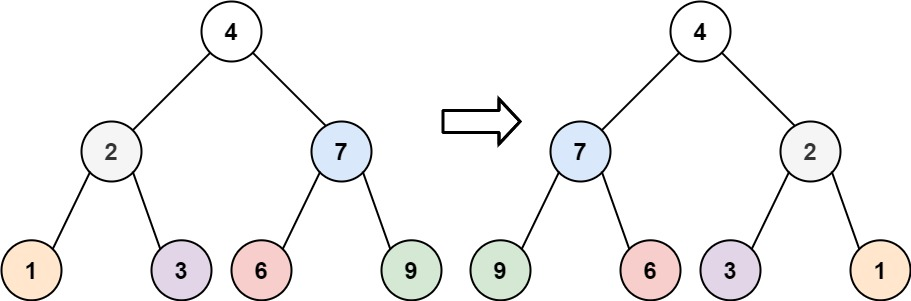

    Input: root = [4,2,7,1,3,6,9]
    Output: [4,7,2,9,6,3,1]

Example 2:

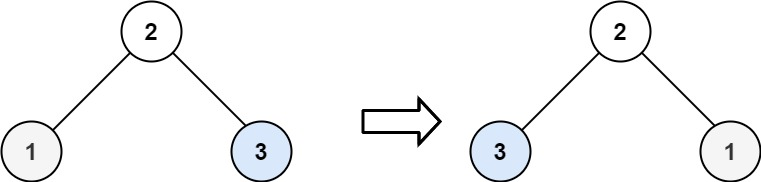

    Input: root = [2,1,3]
    Output: [2,3,1]

Example 3:

    Input: root = []
    Output: []

#### Approach 6.1: Simple & recursion

```py
Function invertTree(root):
    If root is not None:
        Swap root's left and right child nodes
        Call invertTree recursively on root's left child
        Call invertTree recursively on root's right child
    Return root
```

**Time Complexity:**
- In the worst-case scenario, the algorithm will visit every node of the binary tree once.
- Time complexity is O(n), where `n` is the number of nodes in the binary tree.

**Space Complexity:**
- The space complexity is determined by the recursion stack.
- **Worst-case scenario:**  the recursion depth will be equal to the height of the binary tree.
- Therefore, the space complexity is `O(h)`, where `h` is the height of the binary tree.
- In the case of a completely unbalanced binary tree, the height `h` could be equal to the number of nodes `n`, resulting in a space complexity of `O(n)`.
- In a balanced binary tree, the height `h` would be logarithmic with respect to the number of nodes `n`, resulting in a space complexity of `O(log n)`.


In [185]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def invertTree(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        if root != None:
            root.left, root.right = root.right, root.left # swapping valus
            self.invertTree(root.left)
            self.invertTree(root.right)
        return root

### Testing
root = TreeNode(4)
root.left = TreeNode(2)
root.right = TreeNode(7)
root.left.left = TreeNode(1)
root.left.right = TreeNode(3)
root.right.left = TreeNode(6)
root.right.right = TreeNode(9)

print("original root:")
print(root.val)
print(root.left.val, root.right.val)
print(root.left.left.val, root.left.right.val, root.right.left.val, root.right.right.val)

solution = Solution()
inverted_root = solution.invertTree(root)

print("inverted root:")
print(inverted_root.val)
print(inverted_root.left.val, inverted_root.right.val)
print(inverted_root.left.left.val, inverted_root.left.right.val, inverted_root.right.left.val, inverted_root.right.right.val)

original root:
4
2 7
1 3 6 9
inverted root:
4
7 2
9 6 3 1


## 7. [Valid Anagram](https://leetcode.com/problems/valid-anagram/description/)

Given two strings s and t, return true if t is an anagram of s, and false otherwise.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

 

Example 1:

    Input: s = "anagram", t = "nagaram"
    Output: true

Example 2:

    Input: s = "rat", t = "car"
    Output: false
 

Constraints:

1 <= s.length, t.length <= 5 * 104
s and t consist of lowercase English letters.
 

**Follow up:** What if the inputs contain Unicode characters? How would you adapt your solution to such a case?

---

#### Approach 7.1 

**Pseudocode:**
- Create an empty dictionary `seq`.
- Iterate through string `s` and count the frequency of each character, storing it in `seq`.
- Iterate through string `t` and decrement the count of each character in `seq`.
- Return `True` if all counts in seq are zero, indicating that `s` and `t` are anagrams; 
- otherwise, return False.

**Time Complexity:**
- O(n), where n is the length of the strings s and t. 
- This is because each string is iterated over once.
  
**Space Complexity:**
- O(k), where k is the number of unique characters in s and t. 
- This is because the dictionary seq could potentially store all unique characters.

In [186]:
def isAnagram1(s: str, t: str) -> bool:
    if len(s)!=len(t):
        return False
    seq = {}
    for c in s:
        if c not in seq:
            seq[c] = 1
        else:
            seq[c] = seq[c]+1
    #print("adding & iterating first string: ", seq)
    for c in t:
        if c not in seq:
            return False
        else:
            seq[c] = seq[c]-1
    #print("reducing & iterating second string: ", seq)
    return all(val == 0 for val in seq.values())

### Testing
test = ["aacc", "'anagram", "rat", "ded"]
target = ["ccac", "'nagaram", "cat", "edd"]

for i in range(len(test)):
    print("isAnagram1: ", isAnagram1(test[i], target[i]))

isAnagram1:  False
isAnagram1:  True
isAnagram1:  False
isAnagram1:  True


#### Method 7.2 Using sets & list

**Pseudocode**
- Convert `s` into a set to get unique characters.
- Iterate through the unique characters and compare their counts in strings `s` and `t`.
- Return False if the counts of any character differ between `s` and `t`, indicating that `s` and `t` are not anagrams; otherwise, return True.

**Time Complexity:**
- `O(n)`, where `n` is the length of the strings `s` and `t`. 
- This is because for each unique character in s, `count()` is called on both s and t.

**Space Complexity:** 
- O(k), where k is the number of unique characters in s. 
- This is because the set of unique characters is stored temporarily.

In [187]:
def isAnagram2(s: str, t: str) -> bool:
    if len(s)!=len(t):
        return False
    for c in set(list(s)):
        if s.count(c) != t.count(c):
            return False

### Testing
test = ["aacc", "'anagram", "rat", "ded"]
target = ["ccac", "'nagaram", "cat", "edd"]

for i in range(len(test)):
    print("isAnagram2: ", isAnagram2(test[i], target[i]))

isAnagram2:  False
isAnagram2:  None
isAnagram2:  False
isAnagram2:  None


#### Method 7.3 Using collections library

**Psuedocode:**
- Use the Counter class from the collections module to count the occurrences of characters in both strings s and t.
- Compare the counters for equality.
- Return True if the counters are equal, indicating that s and t are anagrams; otherwise, return False.

**Time Complexity:**
- O(n), where n is the total number of characters in both strings s and t. 
- This is because the Counter constructor iterates through each string once.

**Space Complexity:**
- O(k), where k is the number of unique characters in both strings s and t. 
- This is because Counter creates a dictionary-like object where each unique character has an entry.

In [188]:
def isAnagram3(s: str, t: str) -> bool:
    from collections import Counter
    return Counter(s) == Counter(t)

### Testing
test = ["aacc", "'anagram", "rat", "ded"]
target = ["ccac", "'nagaram", "cat", "edd"]

for i in range(len(test)):
    print("isAnagram: ", isAnagram3(test[i], target[i]))

isAnagram:  False
isAnagram:  True
isAnagram:  False
isAnagram:  True


## 8. [Binary Search](https://leetcode.com/problems/binary-search/description/)

Given an array of integers nums which is sorted in ascending order, and an integer target, write a function to search target in nums. If target exists, then return its index. Otherwise, return -1.

You must write an algorithm with `O(log n)` runtime complexity.

 

**Example 1:**

    Input: nums = [-1,0,3,5,9,12], target = 9
    Output: 4
    Explanation: 9 exists in nums and its index is 4

**Example 2:**

    Input: nums = [-1,0,3,5,9,12], target = 2
    Output: -1
    Explanation: 2 does not exist in nums so return -1

---

#### Approach 8.1 : Unsorted Binary Search with Recursion


**Pseudocode:**
- Check if the first index itself is the `target`. if so then return index 0.
- Otherwise:
- find the index that halves of the list, `split`.
- Check if the value is present in the first half or second half.
  - If the value is present in the first half:
    - pass first half of the list.
  - If the value is not in the second half:
    - pass the second half of the list + lenght of the list to keep track of the index.
  
**Note:** *This code can also be used for unsorted lists.*

**Time Complexity:**
- `O(log n)` in the average and best cases, where `n` is the length of the list. This is because the binary search halves the search space with each iteration.

**Space Complexity:**
- `O(log n)` in the worst case due to the recursive calls. This can become an issue for very large lists.


In [189]:
def searchUnsorted(nums: List[int], target: int) -> int:
    if target not in nums:
        return -1
    elif nums[0] == target:
        return 0
    split = len(nums)//2
    if target in nums[:split]:
        return searchUnsorted(nums[:split], target)
    elif target in nums[split:]:
        return split + searchUnsorted(nums[split:], target)

### Testing
tests = [[-1,0,3,5,9,12], [-1,0,3,5,9,12], [10, 5, 4, 8, 19, -1, 100, 9]]
targets = [9, -1, 9]
for i in range(len(tests)):
    print("searchUnsorted: ", searchUnsorted(tests[i], targets[i]))


searchUnsorted:  4
searchUnsorted:  0
searchUnsorted:  7


#### Approach 8.2: Iterative approach for sorted list

**Pseudocode:**

1. Initialize two variables: `low` and `high` to represent the beginning and end of the search space, respectively (initially `low = 0` and `high = len(nums) - 1`).
2. **While loop for binary search:** 
    * As long as `low` is less than or equal to `high` (meaning there's still a search space):
        * Calculate the middle index `mid` using `(low + high) // 2`. 
        * Check if the value at `mid` is equal to the `target`:
            * If `nums[mid] == target`, we found the target element. Return the `mid` index.
        * Otherwise, we need to refine the search space based on the comparison:
            * If `nums[mid] < target`, the target must be in the **right half** of the remaining list. Update `low` to `mid + 1` to exclude the already checked middle element.
            * If `nums[mid] > target`, the target must be in the **left half** of the remaining list. Update `high` to `mid - 1` to exclude the already checked middle element.
3. **Target not found:**
    * If the loop exits without finding a match (i.e., `low` becomes greater than `high`), the target element is not present in the list. Return `-1` to indicate this.

**Time Complexity:** 
- O(log n) same as the code mentioned above.

**Space Complexity:** 
- O(1) because it uses a loop and avoids function call overhead.


In [190]:
def searchSortedIterative(nums: List[int], target: int) -> int:
    low, high = 0,len(nums)-1
    while low<= high:
        mid = (low+high)//2
        if nums[mid]== target:
            return mid
        elif nums[mid]< target:
            low = mid
        else:
            high = mid

### Testing
tests = [[-1,0,3,5,9,12], [-1,0,3,5,9,12]]
targets = [9, -1]
for i in range(len(tests)):
    print("searchSortedIterative: ", searchSortedIterative(tests[i], targets[i]))


searchSortedIterative:  4
searchSortedIterative:  0


## 9. Flood Fill
An image is represented by an m x n integer grid image where image[i][j] represents the pixel value of the image.

You are also given three integers sr, sc, and color. You should perform a flood fill on the image starting from the pixel image[sr][sc].

To perform a flood fill, consider the starting pixel, plus any pixels connected 4-directionally to the starting pixel of the same color as the starting pixel, plus any pixels connected 4-directionally to those pixels (also with the same color), and so on. Replace the color of all of the aforementioned pixels with color.

Return the modified image after performing the flood fill.

 

Example 1:

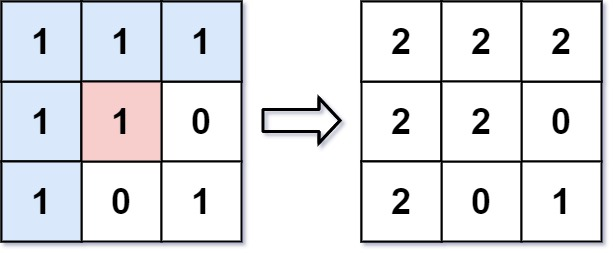

    Input: image = [[1,1,1],[1,1,0],[1,0,1]], sr = 1, sc = 1, color = 2
    Output: [[2,2,2],[2,2,0],[2,0,1]]
    Explanation: From the center of the image with position (sr, sc) = (1, 1) (i.e., the red pixel), all pixels connected by a path of the same color as the starting pixel (i.e., the blue pixels) are colored with the new color.
    Note the bottom corner is not colored 2, because it is not 4-directionally connected to the starting pixel.

Example 2:

    Input: image = [[0,0,0],[0,0,0]], sr = 0, sc = 0, color = 0
    Output: [[0,0,0],[0,0,0]]
    Explanation: The starting pixel is already colored 0, so no changes are made to the image.

#### Approach 9.1: Using recursion

**Pseudocode:**
* The solution has two methods:
    * `fill(self, image, sr, sc, color, curr)`: This recursive helper function performs the actual flood fill operation on a specific pixel (`sr`, `sc`).
        * It checks for boundary conditions (out of image bounds) and early exits if necessary.
        * It compares the current pixel value (`curr`) with the target fill color (`color`). If they differ, it means the pixel hasn't been filled yet and proceeds with filling.
        * It updates the pixel value at (`sr`, `sc`) to the new `color`.
        * It recursively calls itself on the four neighboring pixels (up, down, left, right) to continue the flood fill process.
    * `floodFill(self, image: List[List[int]], sr: int, sc: int, color: int) -> List[List[int]]`: This is the main function that initiates the flood fill process.
        * It checks if the starting pixel's color (`image[sr][sc]`) already matches the target `color`. If they are the same, no change is needed, and the original image is returned.
        * It calls the recursive `fill` function with the starting pixel coordinates (`sr`, `sc`), the new `color`, and the current pixel value (`image[sr][sc]`) as the initial `curr` value.
        * It returns the modified image after the flood fill is complete.


In [191]:
def fill( image, sr, sc, color, curr):
    if sr < 0 or sr >= len(image) or sc < 0 or sc >= len(image[0]):
        return
    if curr!= image[sr][sc]:
        return
    image[sr][sc] = color

    fill(image, sr-1, sc, color, curr)
    fill(image, sr+1, sc, color, curr)
    fill(image, sr, sc-1, color, curr)
    fill(image, sr, sc+1, color, curr)

def floodFillRecursive(image: List[List[int]], sr: int, sc: int, color: int) -> List[List[int]]:
    if image[sr][sc] == color:
        return image
    fill(image, sr, sc, color, image[sr][sc])
    return image

### Testing
tests = [[[1,1,1],[1,1,0],[1,0,1]], [[0,0,0],[0,0,0]]]
srs = [1, 0]
scs = [1, 0]
colors = [2, 0]
for i in range(len(tests)):
    print("floodFillRecursive")

    print("before: ", tests[i])    
    print("after: ", floodFillRecursive(tests[i], srs[i], scs[i], colors[i]))

floodFillRecursive
before:  [[1, 1, 1], [1, 1, 0], [1, 0, 1]]
after:  [[2, 2, 2], [2, 2, 0], [2, 0, 1]]
floodFillRecursive
before:  [[0, 0, 0], [0, 0, 0]]
after:  [[0, 0, 0], [0, 0, 0]]


#### Approach 9.2 Using Iteration



In [192]:
def floodFill(image: List[List[int]], sr: int, sc: int, newColor: int) -> List[List[int]]:
    rows, cols = len(image), len(image[0])
    original_color = image[sr][sc]
    if original_color == newColor:
        return image
    
    visited = set()
    stack = [(sr, sc)]

    while stack:
        row, col = stack.pop()
        if (row, col) in visited or row < 0 or row >= rows or col < 0 or col >= cols or image[row][col] != original_color:
            continue
        image[row][col] = newColor
        visited.add((row, col))
        stack.append((row - 1, col))  # Up
        stack.append((row + 1, col))  # Down
        stack.append((row, col - 1))  # Left
        stack.append((row, col + 1))  # Right

    return image


### Testing
tests = [[[1,1,1],[1,1,0],[1,0,1]], [[0,0,0],[0,0,0]]]
srs = [1, 0]
scs = [1, 0]
colors = [2, 0]
for i in range(len(tests)):
    print("floodFill")
    print("before: ", tests[i])    
    print("after: ", floodFill(tests[i], srs[i], scs[i], colors[i]))


floodFill
before:  [[1, 1, 1], [1, 1, 0], [1, 0, 1]]
after:  [[2, 2, 2], [2, 2, 0], [2, 0, 1]]
floodFill
before:  [[0, 0, 0], [0, 0, 0]]
after:  [[0, 0, 0], [0, 0, 0]]


## 10. Lowest Common Ancestor of a Binary Search Tree

Given a binary search tree (BST), find the lowest common ancestor (LCA) node of two given nodes in the BST.

According to the definition of LCA on Wikipedia: “The lowest common ancestor is defined between two nodes p and q as the lowest node in T that has both p and q as descendants (where we allow a node to be a descendant of itself).”

Example 1:

    Input: root = [6,2,8,0,4,7,9,null,null,3,5], p = 2, q = 8
    Output: 6
    Explanation: The LCA of nodes 2 and 8 is 6.

Example 2:

    Input: root = [6,2,8,0,4,7,9,null,null,3,5], p = 2, q = 4
    Output: 2
    Explanation: The LCA of nodes 2 and 4 is 2, since a node can be a descendant of itself according to the LCA definition.

Example 3:

    Input: root = [2,1], p = 2, q = 1
    Output: 2

#### Approach 10.1 Recusive 

Here's the pseudocode explanation and complexity analysis for the algorithm:

**Pseudocode:**
1. Start from the root node of the binary search tree (BST).
2. Check if the root node is `None`. If so, return `None`.
3. Compare the values of the root node with the values of the nodes `p` and `q`.
4. If the value of the root node is greater than both `p` and `q`, recursively call the function on the left subtree.
5. If the value of the root node is less than both `p` and `q`, recursively call the function on the right subtree.
6. If neither of the above conditions is met, it means that the current root node is the lowest common ancestor. Return the current root node.

**Time Complexity:**
- The time complexity of the algorithm is O(h), where h is the height of the binary search tree.
- In the worst-case scenario, the height of the tree can be equal to the number of nodes in the tree (when the tree is skewed).
- In the average case, the height of the tree is approximately log(n), where n is the number of nodes in the tree.
- Therefore, the average time complexity of the algorithm is O(log(n)).

**Space Complexity:**
- The space complexity of the algorithm is O(h) due to the recursive calls on the call stack.
- In the worst-case scenario, the space complexity can be O(n) when the tree is skewed.
- In the average case, the space complexity is O(log(n)) due to the balanced nature of the binary search tree.

In [193]:

class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        if root == None:
            return None
        if root.val > p.val and root.val > q.val:
            return self.lowestCommonAncestor(root.left, p, q)
        if root.val < p.val and root.val < q.val:
            return self.lowestCommonAncestor(root.right, p, q)
        return root

# [6,2,8,0,4,7,9,null,null,3,5]
root = TreeNode(6)
root.left = TreeNode(2)
root.right = TreeNode(8)
root.left.left = TreeNode(0)
root.left.right = TreeNode(4)
root.right.left = TreeNode(7)
root.right.right = TreeNode(9)
root.left.right.left = TreeNode(3)
root.left.right.right = TreeNode(5)
"""
        __________6__________
    ____2____           ____8____
    0     ___4___       7       9
          3     5 
"""
p = TreeNode(2)
q = TreeNode(8)

print(Solution().lowestCommonAncestor(root, p, q).val)



6


#### Approach 10.2

We can rewrite the same code in more efficient way. The pseudocode & complexities remain same.

In [194]:

class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        while root:
            v, pv, qv = root.val, p.val, q.val
            if v > max(pv, qv): root = root.left
            elif v < min(pv, qv): root = root.right
            else: return root

# [6,2,8,0,4,7,9,null,null,3,5]
root = TreeNode(6)
root.left = TreeNode(2)
root.right = TreeNode(8)
root.left.left = TreeNode(0)
root.left.right = TreeNode(4)
root.right.left = TreeNode(7)
root.right.right = TreeNode(9)
root.left.right.left = TreeNode(3)
root.left.right.right = TreeNode(5)
"""
        __________6__________
    ____2____           ____8____
    0     ___4___       7       9
          3     5 
"""
p = TreeNode(2)
q = TreeNode(8)

print(Solution().lowestCommonAncestor(root, p, q).val)



6


### Optional: Defining and printing a tree.

In [195]:
from collections import deque
class TreeNode():
    def __init__(self, val = 0, left = None, right = None):
        self.val = val
        self.left = left
        self.right = right

def populate_tree(root, values):
    if not values: return None 

    root = TreeNode(values[0]) # initiate the root with the first value of values list
    queue = deque([root]) # creating a queue to keep track of the nodes to populate future values
    i = 1
    n = len(values)

    while i<n:
        current = queue.popleft() # removing the left-most value from the queue and populating value

        # adding value to the left node
        if i<n and values[i] is not None:
            current.left = TreeNode(values[i])
            queue.append(current.left)
        i += 1
        
        # adding value to the right node
        if i<n and values[i] is not None:
            current.right = TreeNode(values[i])
            queue.append(current.right)
        i += 1
    return root

def print_tree(root):
    def inorder_traversal(node, depth = 0):
        if node:
            inorder_traversal(node.right, depth+1)
            print("   "*depth + str(node.val))
            inorder_traversal(node.left, depth +1)
    inorder_traversal(root)

# Example usage:
values = [1, 2, 3, 4, None, 5, 6]
root = populate_tree(None, values)
print("Binary Tree:")
print_tree(root)


    


Binary Tree:
      6
   3
      5
1
   2
      4


## 11 Balanced Binary Tree

Given a binary tree, determine if it is height-balanced. A height-balanced binary tree is a binary tree in which the depth of the two subtrees of every node never differs by more than one.

**Example 1:**
```
    __________3__________
    9              ____20____
                    15       7
```
    Input: root = [3,9,20,null,null,15,7]
    Output: true

**Example 2:**

```
        __________1__________
    ____2____               2
  __3__     3
  4   4
```
nput: root = [1,2,2,3,3,null,null,4,4]
Output: false
Expaination: the tree on the righ has depth of 2, while on left side, the depth is 4.
**Example 3:**

Input: root = []
Output: true 

#### Approach 11.1 DFS: Top-down approach

**Time Complexity:** O(logn) 
    
    T(n) = 2T(n/2) + O(n) ==> O(NlogN)

-  In the average and best cases, where n is the number of nodes in the tree. 
   -  This is because the balanced nature of the tree ensures that insertions and deletions typically require traversing a logarithmic path length to reach the target node.
-  In the worst case, if the tree becomes unbalanced due to a specific sequence of insertions/deletions, the time complexity could degrade to O(n).
  
**Space Complexity:** 
-  The recursive approach has a space complexity of O(log n) in the average case due to the function call stack used for recursion. 
   -  Each recursive call adds a new frame to the stack during the tree traversal. 
   -  In the worst case (unbalanced tree), the space complexity could approach O(n) due to a potentially deep stack.  

In [196]:
def isBalancedTopDown(root: Optional[TreeNode]) -> bool:
    # helper function to calculate the height of a subtree and check for balance
    def getHeight(node):
        if not node: return 0 # Base case: height of tree is 0
        
        # recusevily calculating the height of left & right subtrees
        rl = getHeight(node.left)
        rh = getHeight(node.right)
        
        # if either is unbalanced or current node is unbalances return -1 to indicate unbalanced tree
        if rl == -1 or rh == -1 or abs(rl-rh)>1:
            return -1
        #else return the height of the subtree
        return max(rh, rl)+1
    return getHeight(root) != -1

# example 
list_value = [3,9,20,None,None,15,7]
root1 = populate_tree(None, list_value)
print_tree(root1)
print("Is root1 balanced?", isBalancedTopDown(root1))

list_value = [1,2,2,3,3,None,None ,4,4]
root2 = populate_tree(None, list_value)
print_tree(root2)

print("Is root2 balanced?", isBalancedTopDown(root2))

      7
   20
      15
3
   9
Is root1 balanced? True
   2
1
      3
   2
         4
      3
         4
Is root2 balanced? False


#### Approach 11.2 DFS: Bottom-up approach



**Time Complexity:** O(logn) 

-  In the average and best cases, where n is the number of nodes in the tree. 
   -  This is because the balanced nature of the tree ensures that insertions and deletions typically require traversing a logarithmic path length to reach the target node.
-  In the worst case, if the tree becomes unbalanced due to a specific sequence of insertions/deletions, the time complexity could degrade to O(n).
  
**Space Complexity:** 
- O(1) in the average and worst cases. 
- It avoids the function call stack and typically uses a constant amount of extra space for variables and iterators during the tree manipulation.


In [197]:
# Bottom-Up Approach
def isBalancedBottomUp(root):
    def getHeight(node):
        if not node: return None

        lh = isBalancedBottomUp(node.left)
        if lh == -1: return -1

        rh = isBalancedBottomUp(node.right)
        if rh == -1: return -1

        if abs(lh-rh)>1: return max(lh, rh) + 1
        
    return getHeight(root) != -1

# example 
list_value = [3,9,20,None,None,15,7]
root1 = populate_tree(None, list_value)
print_tree(root1)
print("Is root1 balanced?", isBalancedTopDown(root1))

list_value = [1,2,2,3,3,None,None ,4,4]
root2 = populate_tree(None, list_value)
print_tree(root2)

print("Is root2 balanced?", isBalancedTopDown(root2))


      7
   20
      15
3
   9
Is root1 balanced? True
   2
1
      3
   2
         4
      3
         4
Is root2 balanced? False


### Optional LinkedList

Defining & printing linked lists. 

In [198]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

def populate_list(head, list_value, cycleNode=-1):
    if not list_value:
        return None
    
    curr = head
    cycleNodeHead = None
    i = 0

    for li in list_value:
        curr.next = ListNode(li)
        curr = curr.next
        if i == cycleNode:
            cycleNodeHead = curr
        i += 1

    if cycleNode != -1 and cycleNodeHead is not None:
        curr.next = cycleNodeHead
    
    return head.next  # Return the actual head of the populated linked list

def print_list(node, isCyclic=True):
    visited = set()
    while node:
        if node in visited:
            print(f"Cycle detected at node with value {node.val}")
            break
        print(node.val, "--> ", end="")
        visited.add(node)
        node = node.next
    print("None")

# Example usage:
values, cycle = [1, 2, 3, 4, 5], 2
head = ListNode(0)  # Dummy head
test1 = populate_list(head, values, cycle)
print("Linked List:")
print_list(test1)


Linked List:
1 --> 2 --> 3 --> 4 --> 5 --> Cycle detected at node with value 3
None


## 12. Linked List Cycle

Given head, the head of a linked list, determine if the linked list has a cycle in it.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to. Note that pos is not passed as a parameter.

Return true if there is a cycle in the linked list. Otherwise, return false.

 

Example 1:

    3 --> 2 --> 0 --> -1 --|
          |<---------------|

    Input: head = [3,2,0,-4], pos = 1
    Output: true
    Explanation: There is a cycle in the linked list, where the tail connects to the 1st node (2 is present as index 1).

Example 2:

    1  --> 2 --|
    |<---------|

    Input: head = [1,2], pos = 0
    Output: true
    Explanation: There is a cycle in the linked list, where the tail connects to the 0th node.

Example 3:

    1
    
    Input: head = [1], pos = -1
    Output: false
    Explanation: There is no cycle in the linked list.

#### Approach 12.1 Using two pointers

**Pseudocode:**

- Initialize two pointers slow_pt and fast_pt at the head of the linked list.
- Move slow_pt one step forward and fast_pt two steps forward.
- If `fast_pt` or `fast_pt.next` becomes None (indicating the end of the list), terminate the loop.
- Cycle Detection:
  - Check if slow_pt and fast_pt meet (i.e., point to the same node).
  - If they meet, it indicates the presence of a cycle, so return True.
- If the loop terminates without finding a cycle, return False.

**Time Complexity:**
- The time complexity of this algorithm is O(n), where n is the number of nodes in the linked list.
Both pointers traverse the linked list at different speeds, but the fast pointer moves twice as fast as the slow pointer. Thus, the slow pointer travels at most half the length of the list before being caught by the fast pointer.

**Space Complexity:**

- The space complexity of this algorithm is O(1).
- It uses only a constant amount of extra space for the two pointers, regardless of the size of the linked list.

In [199]:


def hasCycleTwoPointer(head: Optional[ListNode]) -> bool:
    slow_pt, fast_pt = head, head
    while fast_pt and fast_pt.next:
        slow_pt = slow_pt.next
        fast_pt = fast_pt.next.next
        if slow_pt == fast_pt: return True
    return False

# example
values,cycle = [3,2,0,-4], 1
head = ListNode(0) #dummy
test1 = populate_list(head, values, cycle)
print_list(test1, True)

print("Is there any cycle: ", hasCycleTwoPointer(test1))

3 --> 2 --> 0 --> -4 --> Cycle detected at node with value 2
None
Is there any cycle:  True


#### Approach 12.2 Using Hashtables

**Psuedocode:**
```plaintext
1. Initialize an empty set called 'hash' to store traversed nodes.
2. Iterate through the linked list using a while loop until 'head' becomes None.
3. At each iteration:
     a. Check if the current node 'head' is already in the 'hash' set.
     b. If it is, it means there is a cycle, so return True.
     c. Otherwise, add the current node 'head' to the 'hash' set.
     d. Move 'head' to the next node in the linked list.
4. If the while loop completes without finding a cycle, return False.
```

**Time Complexity:**
- The time complexity of this algorithm is O(n), where 'n' is the number of nodes in the linked list. 
- In the worst case, the algorithm needs to traverse the entire linked list to detect a cycle.

**Space Complexity:**
- The space complexity is also O(n), where 'n' is the number of nodes in the linked list.
- This is because the set 'hash' can potentially store all nodes in the linked list in the worst case, if there is a cycle.

In [200]:

def hasCycleHashTable(head: Optional[ListNode]) -> bool:
    hash = set() # stores the traversed nodes
    while head:
        if head in hash:
            return True
        hash.add(head)
        head = head.next

# example
values,cycle = [3,2,0,-4], 1
head = ListNode(0) #dummy
test1 = populate_list(head, values, cycle)
print_list(test1, True)

print("Is there any cycle: ", hasCycleHashTable(test1))

3 --> 2 --> 0 --> -4 --> Cycle detected at node with value 2
None
Is there any cycle:  True


## 13 Implement Queue using Stacks

Implement a first in first out (FIFO) queue using only two stacks. The implemented queue should support all the functions of a normal queue (`push`, `peek`, `pop`, and `empty`).

Implement the `MyQueue` class:

- `void push(int x)` Pushes element x to the back of the queue.
- `int pop()` Removes the element from the front of the queue and returns it.
- `int peek()` Returns the element at the front of the queue.
- `boolean empty()` Returns `true` if the queue is empty, `false` otherwise.
Notes:

You must use only standard operations of a stack, which means only `push to top`, `peek/pop from top`, `size`, and `is empty` operations are valid.
Depending on your language, the stack may not be supported natively. You may simulate a stack using a list or deque (double-ended queue) as long as you use only a stack's standard operations.
 

Example 1:

    Input
    ["MyQueue", "push", "push", "peek", "pop", "empty"]
    [[], [1], [2], [], [], []]
    Output
    [null, null, null, 1, 1, false]

    Explanation
    MyQueue myQueue = new MyQueue();
    myQueue.push(1); // queue is: [1]
    myQueue.push(2); // queue is: [1, 2] (leftmost is front of the queue)
    myQueue.peek(); // return 1
    myQueue.pop(); // return 1, queue is [2]
    myQueue.empty(); // return false

#### Approach 13.1 Simple approach

**Pseudocode**:
```
1. Initialize two empty stacks, s1 and s2.
2. Implement push operation:
    a. While s1 is not empty, pop elements from s1 and push them to s2.
    b. Push the new element to s1.
    c. While s2 is not empty, pop elements from s2 and push them back to s1.
3. Implement pop operation:
    a. Pop and return the top element from s1.
4. Implement peek operation:
    a. Return the top element of s1 without removing it.
5. Implement empty operation:
    a. Return True if s1 is empty, False otherwise.
```

**Time Complexity**:
- **Push**: O(n) - In the worst case, when s1 has n elements, transferring them to s2 takes O(n) time.
- **Pop**: O(1) - Simply pops the top element from s1.
- **Peek**: O(1) - Accesses the top element of s1 without removing it.
- **Empty**: O(1) - Checks if s1 is empty.

**Space Complexity**:
- O(n) - Both stacks, s1 and s2, can potentially store all elements of the queue, resulting in linear space complexity.

In [201]:
class MyQueue:

    def __init__(self):
        self.s1 = []
        self.s2 = []

    def push(self, x: int) -> None:
        while self.s1: self.s2.append(self.s1.pop())
        self.s1.append(x)
        while self.s2: self.s1.append(self.s2.pop())

    def pop(self) -> int:
        return self.s1.pop()

    def peek(self) -> int:
        return self.s1[-1]

    def empty(self) -> bool:
        return not self.s1

mq = MyQueue()
mq.push(2)
mq.push(1)
print(mq.peek())
print(mq.pop())
print(mq.peek())
print(mq.empty())

2
2
1
False


## 14. First Bad Version

You are a product manager and currently leading a team to develop a new product. Unfortunately, the latest version of your product fails the quality check. Since each version is developed based on the previous version, all the versions after a bad version are also bad.

Suppose you have n versions [1, 2, ..., n] and you want to find out the first bad one, which causes all the following ones to be bad.

You are given an API bool isBadVersion(version) which returns whether version is bad. Implement a function to find the first bad version. You should minimize the number of calls to the API.

 

Example 1:

    Input: n = 5, bad = 4
    Output: 4
    Explanation:
    call isBadVersion(3) -> false
    call isBadVersion(5) -> true
    call isBadVersion(4) -> true
    Then 4 is the first bad version.

Example 2:

    Input: n = 1, bad = 1
    Output: 1


#### Approach 14.1

**Description**
The function `firstBadVersion` is designed to find the first bad version in a series of versions ranging from 1 to `n`. The function uses a binary search approach to efficiently determine the first bad version by narrowing down the search range based on whether a mid-point version is bad or not. The function `isBadVersion(mid, hidden)` is assumed to check if a version is bad, where `hidden` is the actual first bad version.

**Pseudocode**
```python
def firstBadVersion(n, hidden):
    start, end = 0, n
    while end - start > 1:
        mid = start + (end - start) // 2
        if isBadVersion(mid, hidden):
            end = mid
        else:
            start = mid
    return end
```

**Time Complexity**
The time complexity of this function is \(O(log n)\). This is because the function uses binary search, which reduces the search space by half in each iteration.

**Space Complexity**
The space complexity of this function is \(O(1)\). The function uses a constant amount of extra space regardless of the input size `n`, as it only uses a few integer variables (`start`, `end`, and `mid`).

In [204]:
def isBadVersion(version: int, unknown:int):
    return version >= unknown

def firstBadVersion( n: int, hidden: int) -> int:
    start,end = 0,n
    while end-start>1:
        mid = start + (end-start)//2 # represents mid of start and end: (start+end)/2
        if isBadVersion(mid, hidden): # we dont know the value of hidden, we need to find out.
            end = mid 
        else: start = mid
    return end

# example
test1 = [45, 88, 122]
unknown_ = [33, 2, 99]

for i in range(len(test1)):
    print(firstBadVersion(test1[i], unknown_[i]))


33
2
99


## 15. Ransom Note

Given two strings ransomNote and magazine, return true if ransomNote can be constructed by using the letters from magazine and false otherwise.

Each letter in magazine can only be used once in ransomNote.

Example 1:

    Input: ransomNote = "a", magazine = "b"
    Output: false

Example 2:

    Input: ransomNote = "aa", magazine = "ab"
    Output: false

Example 3:

    Input: ransomNote = "aa", magazine = "aab"
    Output: true


#### Approach 15.1 Basic method

**Description:** This function checks if it's possible to construct a ransom note from a given magazine. It iterates through the magazine to count the occurrences of each character, then iterates through the ransom note to subtract the counts of characters found in the magazine. If all characters in the ransom note are found in the magazine with sufficient counts, it returns True; otherwise, False.

**Time complexity:** 
- \(O(m + n)\), where \(m\) is the length of the magazine string and \(n\) is the length of the ransomNote string.

**Space complexity:** 
- \(O(m)\), where \(m\) is the length of the magazine string, due to the creation of the stack dictionary to store character counts.

In [208]:
def canConstruct(ransomNote: str, magazine: str) -> bool:
    if not set(ransomNote).issubset(set(magazine)): 
        return False
    stack = {}
    for ch in magazine:
        if ch in stack.keys():  stack[ch] +=1
        else: stack[ch]= 1
    for ch in ransomNote:
        if ch in stack.keys() and stack[ch]>=0:
            stack[ch] -= 1
        else: return False

    return min(stack.values())>=0  

# example:
test1 = ["a", "aa", "aa"]
test2 = ["b", "ab", "aab"]

for i in range(len(test1)):
    print(test2[i], "can be made by ", test1[i], ": ", canConstruct(test1[i], test2[i]))

b can be made by  a :  False
ab can be made by  aa :  False
aab can be made by  aa :  True


#### Approach 15.2 Optimised method

Same approach as 15.1 but more organised and optimised flow. Time complexity remains same.

In [210]:

def canConstructOptimum(ransomNote: str, magazine: str) -> bool:
    # count character frequency in the magazine
    char_count = {}
    for char in magazine:
        char_count[char] = char_count.get(char, 0) + 1

    # check if all characters in ransomNote can be formed from magazine
    for char in ransomNote:
        if char not in char_count or char_count[char] == 0:
            return False
        char_count[char] -= 1  # deecrement count for used characters

    return True

# example:
test1 = ["a", "aa", "aa"]
test2 = ["b", "ab", "aab"]

for i in range(len(test1)):
    print(test2[i], "can be made by ", test1[i], ": ", canConstructOptimum(test1[i], test2[i]))

b can be made by  a :  False
ab can be made by  aa :  False
aab can be made by  aa :  True


#### Approach 15.3 using Collections

**Description:** This optimized function uses the Counter class from the collections module to directly compare the counts of characters in both the ransom note and the magazine. It prints the count of characters in the ransom note and returns True if the count of characters in the ransom note is less than or equal to the count of characters in the magazine; otherwise, it returns False.

**Time complexity:** 
- \(O(m + n)\), where \(m\) is the length of the magazine string and \(n\) is the length of the ransomNote string. This complexity arises from the creation of Counter objects for both strings.

**Space complexity:** 
- \(O(m + n)\), where \(m\) is the number of unique characters in the ransom note and \(n\) is the number of unique characters in the magazine. This complexity arises from the creation of Counter objects for both strings.


In [213]:
from collections import Counter
def canConstructOptimum(ransomNote: str, magazine: str) -> bool:
    print("Counter object of ransomNode & magazine: ", Counter(ransomNote), Counter(magazine))
    return Counter(ransomNote) <= Counter(magazine)

# example:
test1 = ["a", "aa", "aa"]
test2 = ["b", "ab", "aab"]

for i in range(len(test1)):
    print(test2[i], "can be made by ", test1[i], ": ", canConstructOptimum(test1[i], test2[i]))

Counter object of ransomNode & magazine:  Counter({'a': 1}) Counter({'b': 1})
b can be made by  a :  False
Counter object of ransomNode & magazine:  Counter({'a': 2}) Counter({'a': 1, 'b': 1})
ab can be made by  aa :  False
Counter object of ransomNode & magazine:  Counter({'a': 2}) Counter({'a': 2, 'b': 1})
aab can be made by  aa :  True


## 16. Climbing Stairs

You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

 

Example 1:

    Input: n = 2
    Output: 2
    Explanation: There are two ways to climb to the top.
    1. 1 step + 1 step
    2. 2 steps

Example 2:

    Input: n = 3
    Output: 3
    Explanation: There are three ways to climb to the top.
    1. 1 step + 1 step + 1 step
    2. 1 step + 2 steps
    3. 2 steps + 1 step

#### Approach 16.1 Similar to Fibonacci sequence

**Description:** 
- method `climbStairs` that calculates the number of distinct ways to climb n steps, where each time you can either climb 1 or 2 steps.
- The number of steps to reach at position `n` is always sum of steps to reach `n-1` and `n-2`.
- So, we manually initialize 0th, 1st and 2nd steps. Later steps are calculated by previous values of 2 steps. 

**Time complexity:** O(n) - The loop iterates over 'n' steps once, resulting in a linear time complexity.

**Space complexity:** O(n) - The space complexity arises from the list `track`, which stores the number of ways to climb each step up to 'n'. The size of the list grows linearly with 'n', resulting in O(n) space complexity.

In [219]:
def climbStairs(n: int) -> int:
        if n <= 0: return 0
        if n== 1: return 1
        if n == 2: return 2

        track = [0,1,2]
        for i in range(2,n):
            temp = track[i-0]+track[i-1]
            track.append(temp)
        return track.pop()


# example:
test1 = [1,2,3,4,5,6]

for i in range(len(test1)):
    print("Numebr of ways to reach step ", test1[i], " is: ", climbStairs(test1[i]))

Numebr of ways to reach step  1  is:  1
Numebr of ways to reach step  2  is:  2
Numebr of ways to reach step  3  is:  3
Numebr of ways to reach step  4  is:  5
Numebr of ways to reach step  5  is:  8
Numebr of ways to reach step  6  is:  13


## 17.  Longest Palindrome

Given a string s which consists of lowercase or uppercase letters, return the length of the longest palindrome that can be built with those letters.

Letters are case sensitive, for example, "Aa" is not considered a palindrome here.

 

Example 1:

    Input: s = "abccccdd"
    Output: 7
    Explanation: One longest palindrome that can be built is "dccaccd", whose length is 7.

Example 2:

    Input: s = "a"
    Output: 1
    Explanation: The longest palindrome that can be built is "a", whose length is 1.
 



#### Approach 17.1 Simple approach

**Concepts:** The code iterates through each character in the string `s`, maintaining a dictionary `tracker` to count the occurrences of each character. For each character, it checks if the count is even. If so, it increments the `palindrome_len` by 2 and sets the count to 0 in the `tracker`. Finally, it returns the `palindrome_len`, adjusting it by 1 if the length is less than the length of the input string `s`.

**Time Complexity:** 
- \(O(n)\) where \(n\) is the length of the input string `s`. The code iterates through the string once and performs constant time operations for each character.

**Space Complexity:** 
- \(O(k)\) where \(k\) is the number of unique characters in the input string `s`. The space complexity is determined by the size of the `tracker` dictionary, which can contain at most \(k\) key-value pairs, one for each unique character in `s`.

In [222]:
def longestPalindrome(s: str) -> int:
        tracker = {}
        palindrome_len = 0
        for ch in s:
            tracker[ch] = tracker.get(ch, 0)+1
            #for count in tracker.values():
            if tracker.get(ch)%2 == 0:
                palindrome_len += 2
                tracker[ch] = 0
        
        if palindrome_len < len(s): return palindrome_len +1
        else: return palindrome_len


# example:
test1 = ["abaabuffu", "tytytyty", "zooombaz"]

for i in range(len(test1)):
    print("Biggest palindrome using the words ", test1[i], " is: ", longestPalindrome(test1[i]))

Biggest palindrome using the words  abaabuffu  is:  9
Biggest palindrome using the words  tytytyty  is:  8
Biggest palindrome using the words  zooombaz  is:  5


## Reverse Linked List

Given the head of a singly linked list, reverse the list, and return the reversed list.

Example 1:

    Input: head = [1,2,3,4,5]
    Output: [5,4,3,2,1]

Example 2:

    Input: head = [1,2]
    Output: [2,1]

Example 3:

    Input: head = []
    Output: []
 

#### Approach 18.1 Iterative approach

**Concepts**
- This algorithm reverses a singly linked list.
- It uses three pointers: `prev` to keep track of the previous node, `curr` to traverse the list, and `next` to temporarily store the next node.
- By iterating through the list, it changes the direction of each node's `next` pointer to reverse the list.

**Time Complexity**
- **O(n)**: The algorithm makes a single pass through the list, where `n` is the number of nodes in the list.

**Space Complexity**
- **O(1)**: The algorithm uses a constant amount of extra space regardless of the size of the input list.

In [241]:
def reverseList(head: Optional[ListNode]) -> Optional[ListNode]:
    prev = None
    curr = head
    while curr:
        next = curr.next
        curr.next = prev
        prev = curr
        curr = next
    print(prev.val)
    return prev


# example:
list1 = [1,2,3,4,5]
head = ListNode(0)
test1 = populate_list(head, list1 )
print_list(test1)


reversed_list1 = reverseList(list1)
print(reversed_list1)
print("Revered Linked list is: ", list(reversed_list1)) # ListNode can be converted to list

1 --> 2 --> 3 --> 4 --> 5 --> None


AttributeError: 'list' object has no attribute 'next'

#### 18.2 Recursive approach



In [243]:
def reverseListRecursive(head: Optional[ListNode]) -> Optional[ListNode]:
    if head is None:
        return head
    new_head = reverseListRecursive(head.next)
    head.next = None
    new_head.next = head
    return new_head
    
        


# example:
list1 = [1,2,3,4,5]
head = ListNode(0)
test1 = populate_list(head, list1 )
print_list(test1)


reversed_list1 = reverseListRecursive(list1)
# the returned object is not a linked list, instead a list_reverseiterator object.
print(reversed_list1)
print("Revered Linked list is: ", list(reversed_list1)) # ListNode can be converted to list

<class '__main__.ListNode'>
1 --> 2 --> 3 --> 4 --> 5 --> None


AttributeError: 'list' object has no attribute 'next'

### 1. 

### 1. 

### 1. 

### 1. 

### 1. 

### 1. 

# Medium
**(42 Questions)**

# Hard
**(9 Questions)**